# Compression Using Principal Component Analysis
In this exercise, I will compress an open source image using sklearn's pca function and see the results. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [10]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

array([[ 9.46443544e+01, -4.53416776e+02, -2.27156420e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.60037698e+02, -1.98408394e+02, -5.27439450e+02, ...,
        -6.27097386e-15, -1.76489133e-13, -1.12213506e-13],
       [ 9.23708861e+02, -2.55205409e+02, -5.06070256e+02, ...,
        -9.55893644e-14,  7.81336728e-13, -2.15510264e-13],
       ...,
       [ 2.86150621e+02, -1.15642331e+02,  5.17458772e+02, ...,
         1.07735184e-15,  3.34644199e-15,  1.97264032e-17],
       [ 7.15222534e+02, -7.65900858e+02,  5.58874889e+02, ...,
         1.24359802e-15,  1.73774702e-15,  5.24827685e-16],
       [-2.28868524e+02,  4.47310379e+02,  3.33449744e+02, ...,
        -1.06364613e-15,  2.75462320e-17, -4.99544773e-16]])

In [13]:
len(X_train.columns)

784

Find the number of dimensions that keep 95% variance, to make a point later on. 

In [14]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [15]:
d

154

The _n\_components_ of pcs is overloaded and if we give 0.95 as the parameter is does the same work as giving the desired d.

In [16]:
pca = PCA(n_components=.95)   # using 95% as the paramenter
X_reduced=pca.fit_transform(X_train)
pca.n_components_

154

In [17]:
pca = PCA(n_components=154) # using 154 as parameter
X_reduced=pca.fit_transform(X_train)
pca.explained_variance_ratio_.sum()

0.9500882146359839

In [18]:
X_recovered = pca.inverse_transform(X_reduced)

In [19]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

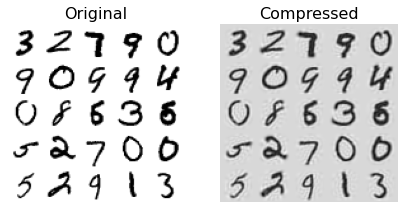

In [20]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
temp=pd.DataFrame(X_train[::2100]).to_numpy()
plot_digits(temp)
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)